# Persiapan File SHERIFS untuk area patahan

Jalankan file ini di jupyter dengan cara mengubah kernel ke `maps`. Jika kernel `maps` belum ada, lakukan langkah-langkah berikut ini:

1. Buka Anaconda Prompt
2. Buat environment baru: `conda create -n maps python=3.9`
3. Aktifkan environment `maps`: `conda activate maps`
4. Install `geopandas`: `pip install geopandas`
5. Install `matplotlib`: `pip install matplotlib`
6. Install `ipykernel`: `pip install ipykernel`
7. Daftarkan ke dalam kernel: `python -m ipykernel install --name "maps" --display-name "maps"`

Data yang disimpan dalam format shp dapat digunakan di QGIS

## Informasi mengenai rake

Rake merupakan sudut yang terbentuk antara arah slip dan strike, besarnya sudut berlawanan dengan arah jarum jam.

1. Sesar geser arah kanan = 180
2. Sesar geser arah kiri = 0
3. Sesar turun = -90
4. Sesar naik = 90

## 1. Import packages

In [2]:
from custom_maps import *

## 2. cek strike sesar

In [2]:
# membuka data shp patahan
gdf_faults = gpd.read_file('./shp/faults.shp')

# cek indeks masing-masing patahan
gdf_faults['Segment__1']

0      KumeringNorth
1      KumeringSouth
2    Semangkobarat-A
3    SemangkoTimur-A
4    Semangkobarat-B
5    SemangkoTimur-B
6     SemangkoGraben
7            Enggano
Name: Segment__1, dtype: object

In [6]:
# menyusun ulang koordinat patahan agar searah dengan strike
# gdf_faults.geometry[0] = reverse_geom(gdf_faults.geometry[0])
# gdf_faults.geometry[1] = reverse_geom(gdf_faults.geometry[1])
# gdf_faults.geometry[7] = reverse_geom(gdf_faults.geometry[7])
gdf_faults.geometry[6] = reverse_geom(gdf_faults.geometry[6])

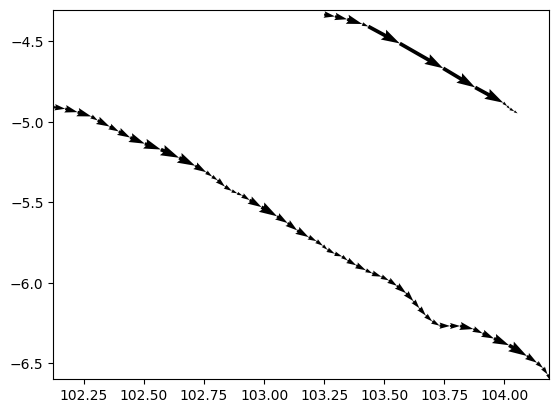

In [11]:
# mengecek arah strike
fig, ax = plt.subplots()
for geom in gdf_faults.geometry[[0,7]]:
    plot_line(geom, ax)

## 3. sections.geojson

In [5]:
# membuka dict patahan (berisi informasi merged dan individual)
dict_faults = open_pkl('dict_faults.pkl')

In [6]:
# menyatukan informasi geologi dengan geometri patahan (arah STRIKE sudah harus sesuai)
df = pd.read_csv('geologi-patahan.csv')
gdf_geology_faults = gpd.GeoDataFrame(df, geometry=gdf_faults.geometry)
gdf_geology_faults

,si,name,model,sr_min,sr_mean,sr_max,dip,oriented,rake,up_s_d,lo_s_d,Domain,shear_modulus,geometry
0,0,KumeringNorth,Lampung,14,14,14,90,SW,180,0,20,Active Shallow Crust,30,"LINESTRING Z (103.24981 -4.33236 0.00000, 103...."
1,1,KumeringSouth,Lampung,14,14,14,90,SW,180,0,20,Active Shallow Crust,30,"LINESTRING Z (104.00669 -4.92233 0.00000, 104...."
2,2,Semangkobarat-A,Lampung,8,8,8,90,SW,180,0,20,Active Shallow Crust,30,"LINESTRING Z (104.27982 -5.16915 0.00000, 104...."
3,3,SemangkoTimur-A,Lampung,7,7,7,90,SW,180,0,20,Active Shallow Crust,30,"LINESTRING Z (104.35652 -5.27485 0.00000, 104...."
4,4,Semangkobarat-B,Lampung,8,8,8,90,SW,180,0,20,Active Shallow Crust,30,"LINESTRING Z (104.25787 -5.20948 0.00000, 104...."
5,5,SemangkoTimur-B,Lampung,3,3,3,90,SW,180,0,20,Active Shallow Crust,30,"LINESTRING Z (104.66574 -5.75236 0.00000, 104...."
6,6,SemangkoGraben,Lampung,3,3,3,60,W,-90,0,20,Active Shallow Crust,30,"LINESTRING Z (105.17460 -5.91349 0.00000, 105...."
7,7,Enggano,Lampung,5,5,5,45,W,90,0,20,Active Shallow Crust,30,"LINESTRING Z (102.12332 -4.90860 0.00000, 102...."


In [7]:
# menyimpan ke dalam bentuk geojson
save_faults_geojson(gdf_geology_faults, dict_faults)

In [8]:
# mengecek file yang sudah dibuat
glob.glob('./json_output/*')

['./json_output/json_fault_Enggano.geojson',
 './json_output/json_fault_KumeringNorth_others.geojson',
 './json_output/json_area_fault_KumeringNorth_others.geojson']

In [9]:
# menyalin patahan geojson ke Example SHERIFS dengan nama sections.geojson
shutil.copyfile('./json_output/json_fault_KumeringNorth_others.geojson',
               './SHERIFS/Example/data/sections.geojson')

'./SHERIFS/Example/data/sections.geojson'

## 3. bg.geojson

In [10]:
# membuka area patahan
gdf_area_faults = gpd.read_file('./shp_output/area_fault_KumeringNorth_others/area_fault_KumeringNorth_others.shp')
gdf_area_faults

,FID,geometry
0,0,"POLYGON ((105.36665 -5.88212, 105.37595 -5.898..."


In [11]:
# menyimpan area patahan ke dalam bentuk geojson
save_area_fault_geojson(gdf_area_faults, 'json_area_fault_KumeringNorth_others.geojson', model="Lampung")

In [12]:
# mengecek file yang sudah dibuat
glob.glob('./json_output/*')

['./json_output/json_fault_Enggano.geojson',
 './json_output/json_fault_KumeringNorth_others.geojson',
 './json_output/json_area_fault_KumeringNorth_others.geojson']

In [13]:
# menyalin area patahan geojson ke Example SHERIFS dengan nama bg.geojson
shutil.copyfile('./json_output/json_area_fault_KumeringNorth_others.geojson',
               './SHERIFS/Example/data/bg.geojson')

'./SHERIFS/Example/data/bg.geojson'

## Catatan:

Di SHERIFS, terdapat struktur seperti ini:

```
Example/
├── data/
│   ├── Background_properties.txt
│   ├── bg.geojson
│   └── sections.geojson
├── input/
│   ├── LT.toml
│   ├── bg_seismicity.txt
│   ├── ruptures.txt
│   └── sherifs_in.toml
└── output/
...
```

Adapun `bg.geojson` dan `sections.geojson` sudah dibuat di OQ010. Namun, file-file lainnya harus dibuat manual. Agar memudahkan pengerjaan, file yang sudah ada di Example dapat di ubah.

### Background_properties.txt
```
Lampung	upperSeismoDepth	0.
Lampung	lowerSeismoDepth	20.
Lampung	ruptAspectRatio	1.
Lampung	nodalPlane	0.5	135.	90.	180.
Lampung	nodalPlane	0.5	315.	90.	180.
Lampung	hypoDepth	0.2	5.
Lampung	hypoDepth	0.3	10.
Lampung	hypoDepth	0.2	15.
Lampung	hypoDepth	0.3	20.
```

model `Lampung` diganti dengan model penelitian masing-masing. Adapun `nodalPlane` berisi nilai "probability, strike, dip, rake". `hypoDepth` berisi nilai "probability, depth".

### sherifs_in.toml
Contoh dapat dilihat di folder SHERIFS/Example/input.

Yang perlu diganti adalah:
```
dirpath = "lokasi/folder/SHERIFS/Example"

[pre]
...
Model_name = "Nama Model"
...

```


### ruptures.txt
atur skenario multiple ruptures
```
set set_1
0 1
```

### bg_seismicity.txt
perbandingan seismisitas PADA SESAR. Dimulai dari magnitudo 4, 4.5, dst..
```
bg BG_1
0.5 0.5 0.6 0.7 0.8 0.9 1.0 1.0 1.0
```

### LT.toml
hasil b value dapat dimasukkan di sini. Model diganti dengan nama model penelitian masing-masing.
```
Models = ["Lampung"]

MFD_shape = [["GR", "1.0"]]

Background = ["BG_1"]

scenario_set = ["set_1"]

Scaling_Laws = [["WC1994", "Area", "m"]]
```